## Step1 Data Processing

In [11]:
import pandas as pd
import numpy as np

# ==================== Load Data ====================
df = pd.read_csv('HW3-data.csv')

print("Dataset Shape:", df.shape)
print("\n" + "="*50)

# ==================== Basic Information ====================
print("First 5 rows:")
print(df.head())
print("\n" + "="*50)

print("Data Types:")
print(df.dtypes)
print("\n" + "="*50)

print("Statistical Summary:")
print(df.describe())
print("\n" + "="*50)

# ==================== Check Missing Values ====================
print("Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])
if missing.sum() == 0:
    print("No missing values found.")
print("\n" + "="*50)

# ==================== Target Variable Distribution ====================
print("Diagnosis Distribution:")
print(df['Diagnosis'].value_counts())
print("\nDiagnosis Proportions:")
print(df['Diagnosis'].value_counts(normalize=True))
print("\n" + "="*50)

# ==================== Encode Target Variable ====================
# Convert Diagnosis: M=1 (Malignant), B=0 (Benign)
df['Diagnosis_encoded'] = df['Diagnosis'].map({'M': 1, 'B': 0})

print("Encoded Diagnosis Distribution:")
print(df['Diagnosis_encoded'].value_counts())
print("\n" + "="*50)

# ==================== Feature Separation ====================
# Separate features into M (Mean), SE (Standard Error), W (Worst)
feature_cols = df.columns.drop(['ID', 'Diagnosis', 'Diagnosis_encoded'])

mean_features = [col for col in feature_cols if col.endswith('M')]
se_features = [col for col in feature_cols if col.endswith('SE')]
worst_features = [col for col in feature_cols if col.endswith('W')]

print(f"Mean features ({len(mean_features)}): {mean_features}")
print(f"\nSE features ({len(se_features)}): {se_features}")
print(f"\nWorst features ({len(worst_features)}): {worst_features}")
print("\n" + "="*50)

# ==================== Check for Duplicates ====================
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"After removing duplicates: {df.shape}")
print("\n" + "="*50)

# ==================== Prepare Final Dataset ====================
# Features (X) and Target (y)
X = df[feature_cols]
y = df['Diagnosis_encoded']

print(f"Feature matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")
print(f"\nClass distribution in y:")
print(y.value_counts())

print("\n" + "="*50)
print("Data Processing Complete!")
print("="*50)

Dataset Shape: (569, 32)

First 5 rows:
         ID Diagnosis  RadiusM  TextureM  PerimeterM   AreaM  SmoothnessM  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   CompactnessM  ConcavityM  ConcavePointsM  ...  RadiusW  TextureW  \
0       0.27760      0.3001         0.14710  ...    25.38     17.33   
1       0.07864      0.0869         0.07017  ...    24.99     23.41   
2       0.15990      0.1974         0.12790  ...    23.57     25.53   
3       0.28390      0.2414         0.10520  ...    14.91     26.50   
4       0.13280      0.1980         0.10430  ...    22.54     16.67   

   PerimeterW   AreaW  SmoothnessW  CompactnessW  ConcavityW  ConcaveP

# Step 2: EDA & Visualization


Step 2: EDA & Visualization...


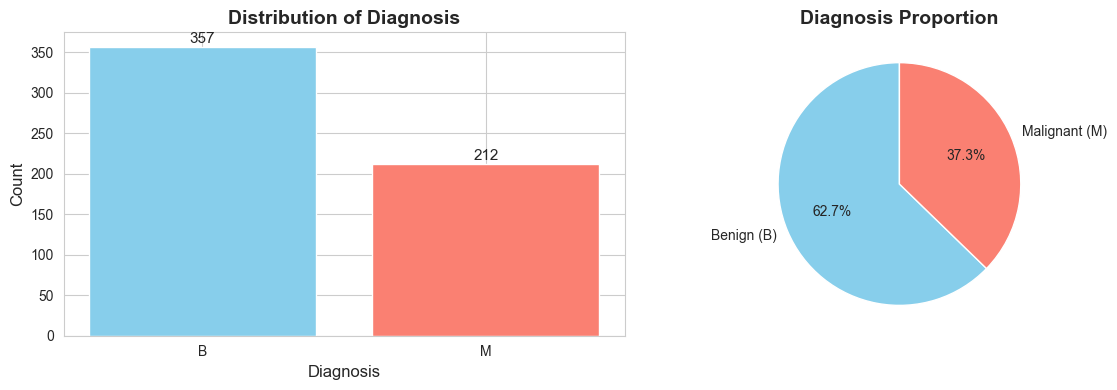

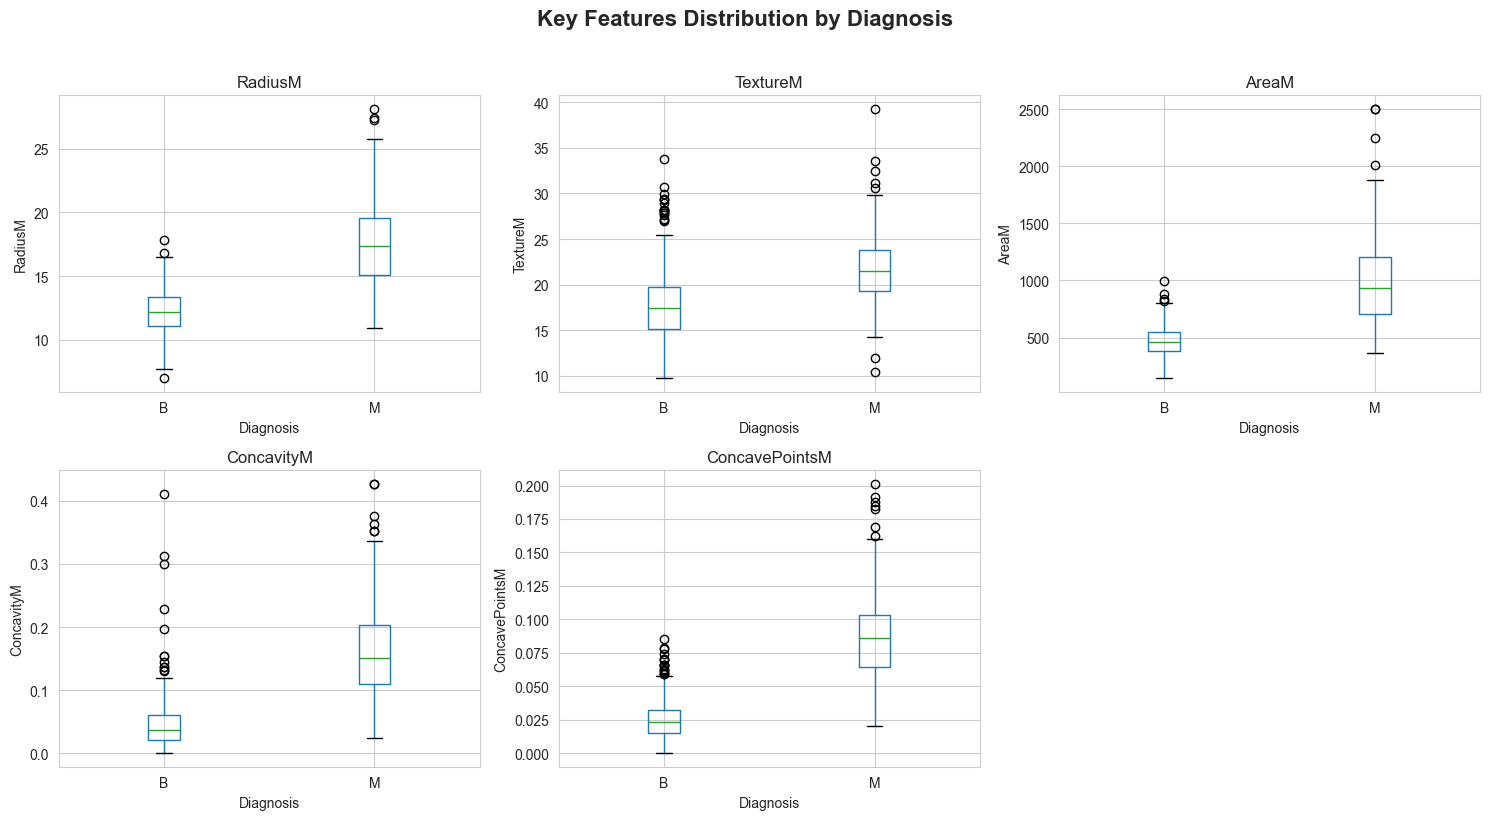

C:\Users\Gary\AppData\Local\Temp\ipykernel_8760\4219443627.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Diagnosis', y=feature, ax=axes[idx], palette=['skyblue', 'salmon'])
C:\Users\Gary\AppData\Local\Temp\ipykernel_8760\4219443627.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Diagnosis', y=feature, ax=axes[idx], palette=['skyblue', 'salmon'])
C:\Users\Gary\AppData\Local\Temp\ipykernel_8760\4219443627.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Diagnosis', y=feature, ax=axes

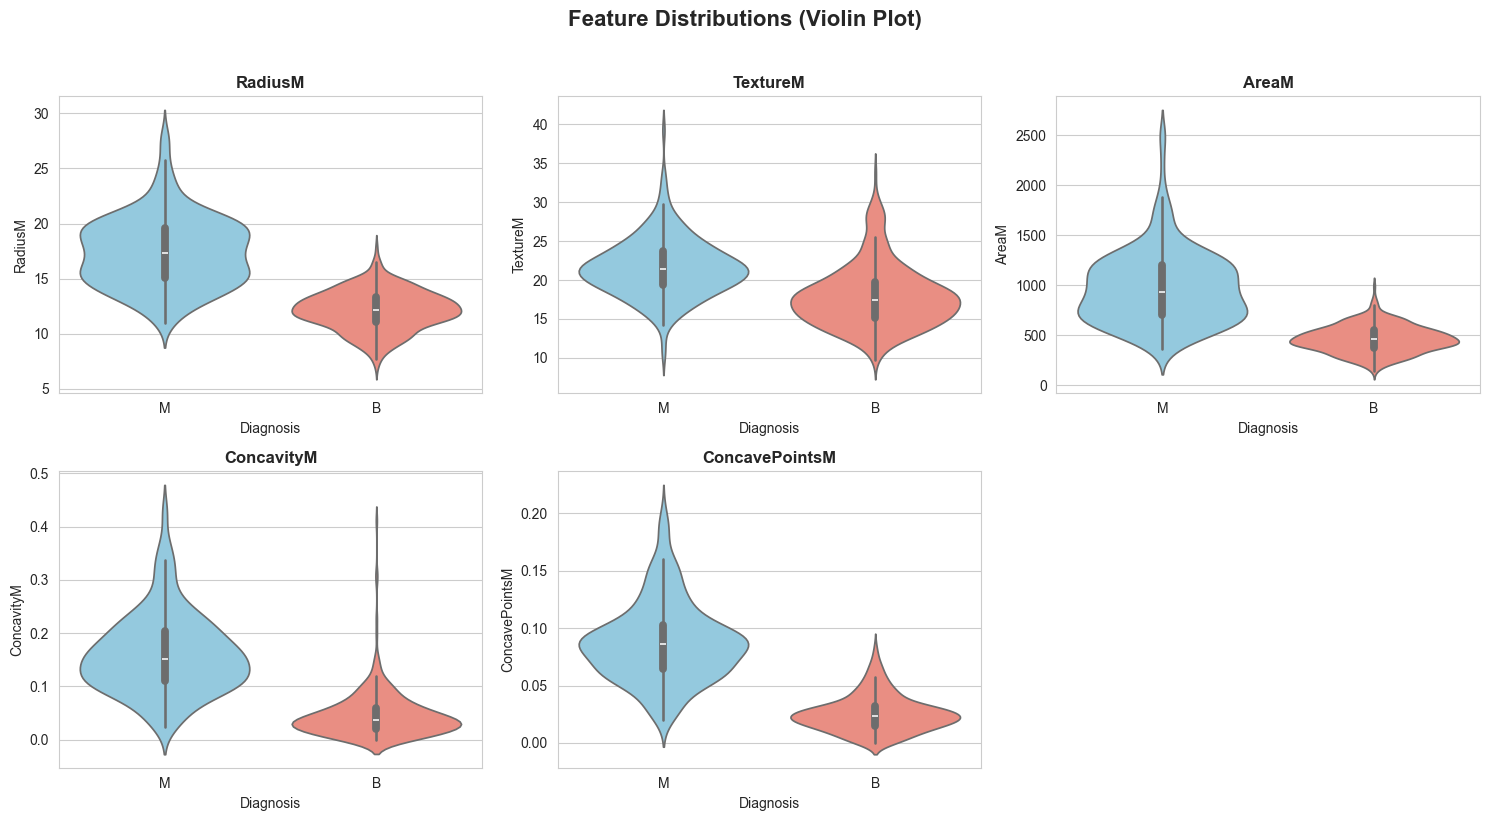

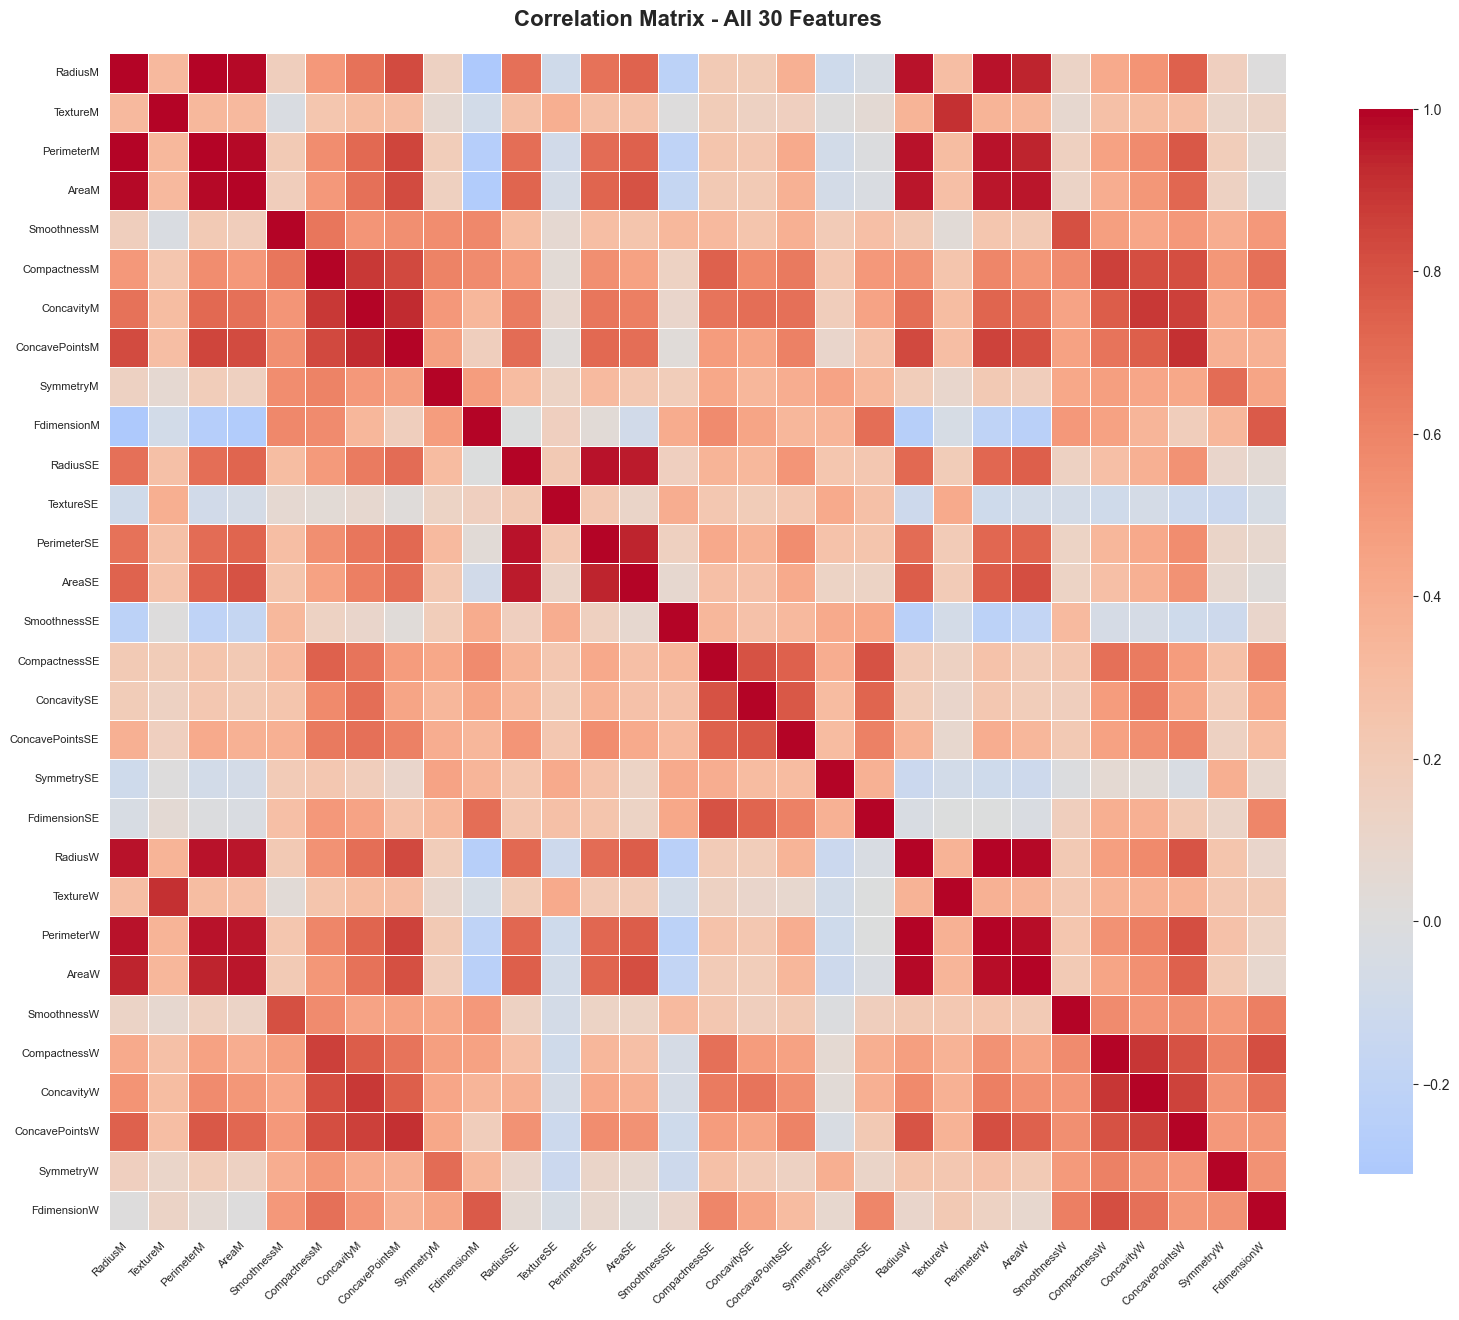

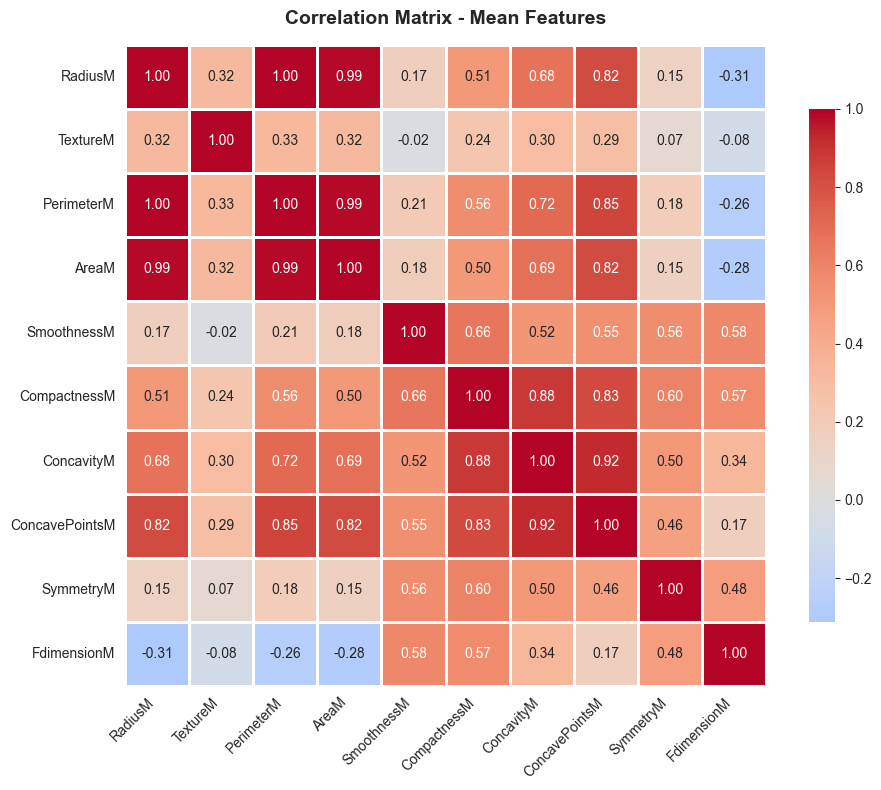


High Correlation Pairs (|r| > 0.9):
     Feature 1      Feature 2  Correlation
       RadiusM     PerimeterM     0.997855
       RadiusW     PerimeterW     0.993708
       RadiusM          AreaM     0.987357
    PerimeterM          AreaM     0.986507
       RadiusW          AreaW     0.984015
    PerimeterW          AreaW     0.977578
      RadiusSE    PerimeterSE     0.972794
    PerimeterM     PerimeterW     0.970387
       RadiusM        RadiusW     0.969539
    PerimeterM        RadiusW     0.969476
       RadiusM     PerimeterW     0.965137
         AreaM        RadiusW     0.962746
         AreaM          AreaW     0.959213
         AreaM     PerimeterW     0.959120
      RadiusSE         AreaSE     0.951830
    PerimeterM          AreaW     0.941550
       RadiusM          AreaW     0.941082
   PerimeterSE         AreaSE     0.937655
    ConcavityM ConcavePointsM     0.921391
      TextureM       TextureW     0.912045
ConcavePointsM ConcavePointsW     0.910155


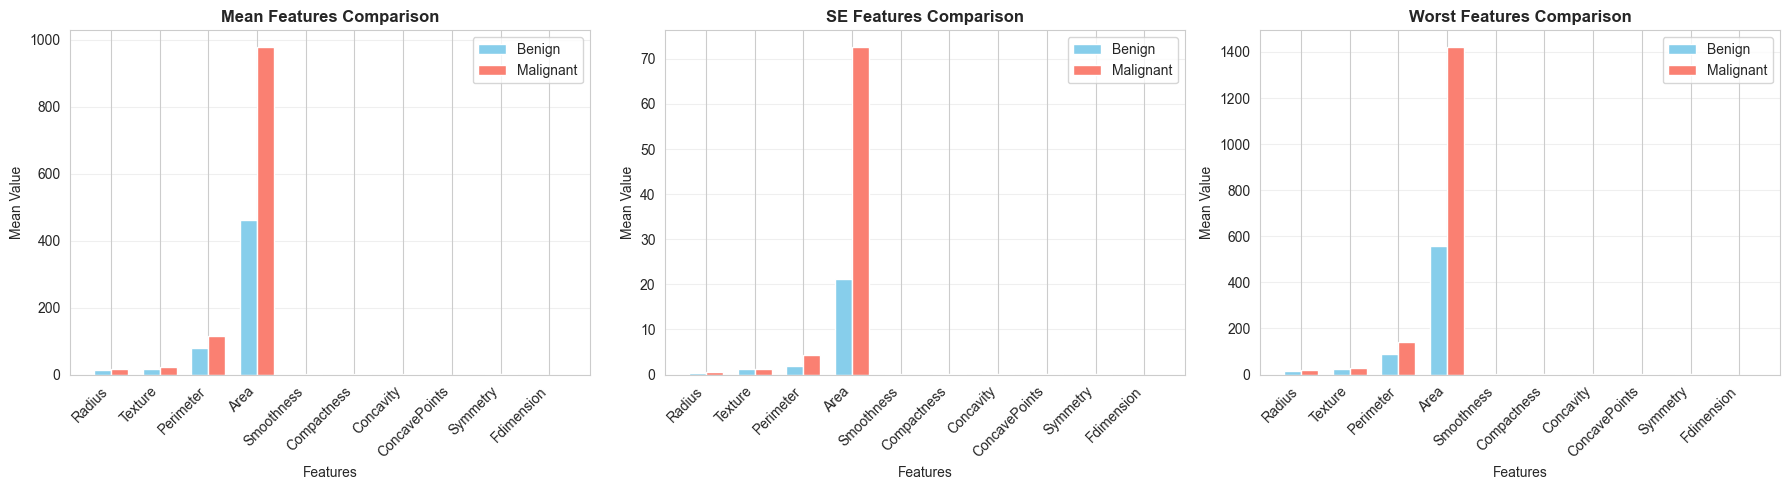


Generating pairplot for selected features (this may take a moment)...


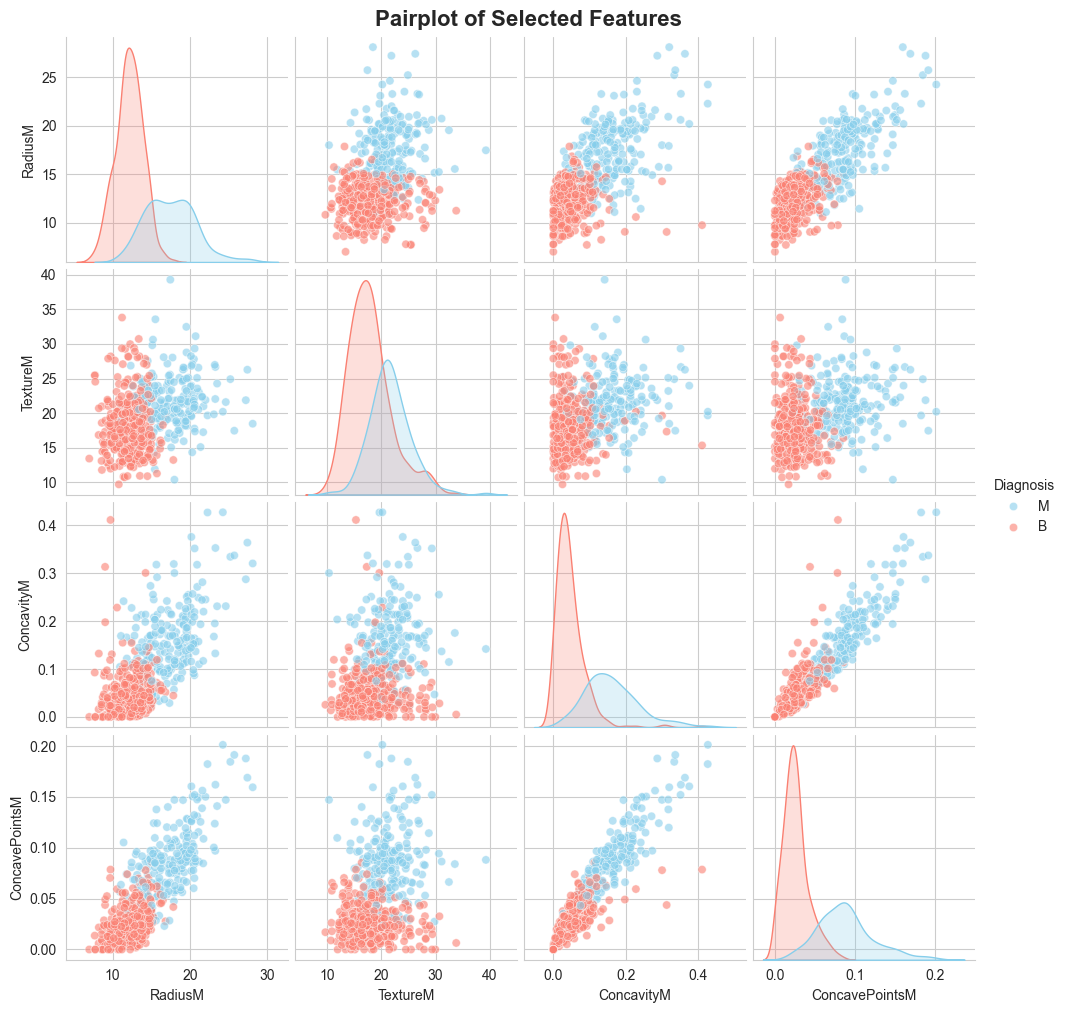

Summary Statistics by Diagnosis (Mean Features):
             RadiusM             TextureM            PerimeterM             \
                mean       std       mean       std        mean        std   
Diagnosis                                                                    
B          12.146524  1.780512  17.914762  3.995125   78.075406  11.807438   
M          17.462830  3.203971  21.604906  3.779470  115.365377  21.854653   

                AreaM             SmoothnessM           CompactnessM  \
                 mean         std        mean       std         mean   
Diagnosis                                                              
B          462.790196  134.287118    0.092478  0.013446     0.080085   
M          978.376415  367.937978    0.102898  0.012608     0.145188   

                    ConcavityM           ConcavePointsM           SymmetryM  \
                std       mean       std           mean       std      mean   
Diagnosis                                

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*50)
print("Step 2: EDA & Visualization...")
print("="*50)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# ==================== 2.1 Target Variable Distribution ====================
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
diagnosis_counts = df['Diagnosis'].value_counts()
axes[0].bar(diagnosis_counts.index, diagnosis_counts.values, color=['skyblue', 'salmon'])
axes[0].set_xlabel('Diagnosis', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Diagnosis', fontsize=14, fontweight='bold')
for i, v in enumerate(diagnosis_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontsize=11)

# Pie chart
colors = ['skyblue', 'salmon']
axes[1].pie(diagnosis_counts.values, labels=['Benign (B)', 'Malignant (M)'], 
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Diagnosis Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ==================== 2.2 Feature Distributions by Diagnosis ====================
# Select key features for visualization
key_features = ['RadiusM', 'TextureM', 'AreaM', 'ConcavityM', 'ConcavePointsM']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    # Box plot
    df.boxplot(column=feature, by='Diagnosis', ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('Diagnosis')
    axes[idx].set_ylabel(feature)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['B', 'M'])

# Remove extra subplot
fig.delaxes(axes[5])
plt.suptitle('Key Features Distribution by Diagnosis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ==================== 2.3 Violin Plots for Better Distribution View ====================
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.violinplot(data=df, x='Diagnosis', y=feature, ax=axes[idx], palette=['skyblue', 'salmon'])
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Diagnosis')

fig.delaxes(axes[5])
plt.suptitle('Feature Distributions (Violin Plot)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ==================== 2.4 Correlation Matrix - All Features ====================
plt.figure(figsize=(16, 14))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            xticklabels=True, yticklabels=True)
plt.title('Correlation Matrix - All 30 Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()


# ==================== 2.5 Correlation Matrix - Mean Features Only ====================
plt.figure(figsize=(10, 8))
mean_corr = df[mean_features].corr()
sns.heatmap(mean_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Mean Features', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Correlation Matrix.png', dpi=600, bbox_inches='tight')
plt.show()

# ==================== 2.6 High Correlation Pairs ====================
print("\n" + "="*50)
print("High Correlation Pairs (|r| > 0.9):")
print("="*50)

# Get upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find high correlations
high_corr = []
for column in upper_tri.columns:
    for index in upper_tri.index:
        corr_value = upper_tri.loc[index, column]
        if abs(corr_value) > 0.9:
            high_corr.append([index, column, corr_value])

high_corr_df = pd.DataFrame(high_corr, columns=['Feature 1', 'Feature 2', 'Correlation'])
high_corr_df = high_corr_df.sort_values('Correlation', key=abs, ascending=False)
print(high_corr_df.to_string(index=False))

# ==================== 2.7 Feature Groups Comparison ====================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean features
mean_data_m = df[df['Diagnosis'] == 'M'][mean_features].mean()
mean_data_b = df[df['Diagnosis'] == 'B'][mean_features].mean()
x = np.arange(len(mean_features))
width = 0.35
axes[0].bar(x - width/2, mean_data_b, width, label='Benign', color='skyblue')
axes[0].bar(x + width/2, mean_data_m, width, label='Malignant', color='salmon')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Mean Value')
axes[0].set_title('Mean Features Comparison', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels([f.replace('M', '') for f in mean_features], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# SE features
se_data_m = df[df['Diagnosis'] == 'M'][se_features].mean()
se_data_b = df[df['Diagnosis'] == 'B'][se_features].mean()
x = np.arange(len(se_features))
axes[1].bar(x - width/2, se_data_b, width, label='Benign', color='skyblue')
axes[1].bar(x + width/2, se_data_m, width, label='Malignant', color='salmon')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Mean Value')
axes[1].set_title('SE Features Comparison', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f.replace('SE', '') for f in se_features], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Worst features
worst_data_m = df[df['Diagnosis'] == 'M'][worst_features].mean()
worst_data_b = df[df['Diagnosis'] == 'B'][worst_features].mean()
x = np.arange(len(worst_features))
axes[2].bar(x - width/2, worst_data_b, width, label='Benign', color='skyblue')
axes[2].bar(x + width/2, worst_data_m, width, label='Malignant', color='salmon')
axes[2].set_xlabel('Features')
axes[2].set_ylabel('Mean Value')
axes[2].set_title('Worst Features Comparison', fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels([f.replace('W', '') for f in worst_features], rotation=45, ha='right')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('Feature Groups Comparison.png', dpi=600, bbox_inches='tight')
plt.show()

# ==================== 2.8 Pairplot for Selected Features ====================
print("\nGenerating pairplot for selected features (this may take a moment)...")
selected_features = ['RadiusM', 'TextureM', 'ConcavityM', 'ConcavePointsM', 'Diagnosis']
pairplot_data = df[selected_features]

sns.pairplot(pairplot_data, hue='Diagnosis', palette=['skyblue', 'salmon'], 
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pairplot of Selected Features', fontsize=16, fontweight='bold', y=1.01)
plt.savefig('Pairplot for Selected Features.png', dpi=600, bbox_inches='tight')
plt.show()


# ==================== 2.9 Summary Statistics by Diagnosis ====================
print("Summary Statistics by Diagnosis (Mean Features):")

summary_stats = df.groupby('Diagnosis')[mean_features].agg(['mean', 'std'])
print(summary_stats)

print("\n" + "="*50)
print("EDA & Visualization Complete!")

# Step 3 Modeling Logistic Regression

Step 3: Model Building - Logistic Regression

Feature matrix shape: (569, 30)
Target vector shape: (569,)
Class distribution:
Diagnosis_encoded
0    357
1    212
Name: count, dtype: int64

3.2 Train-Test Split (80-20):
Training set: 455 samples
Test set: 114 samples

Training set class distribution:
Diagnosis_encoded
0    285
1    170
Name: count, dtype: int64

Test set class distribution:
Diagnosis_encoded
0    72
1    42
Name: count, dtype: int64

3.3 Feature Standardization:
Standardization complete!
Mean of scaled training features: 0.000000
Std of scaled training features: 1.001101

3.4 Baseline Logistic Regression Model:

Baseline Model Performance:
--------------------------------------------------
Training Accuracy: 0.9868
Test Accuracy: 0.9649
Test Precision: 0.9750
Test Recall: 0.9286
Test F1-Score: 0.9512
Test ROC-AUC: 0.9960

3.5 Regularized Logistic Regression:

(a) L1 Regularization (Lasso):
Test Accuracy: 0.9737
Test ROC-AUC: 0.9964
Non-zero coefficients: 14/30

(b) L2 R

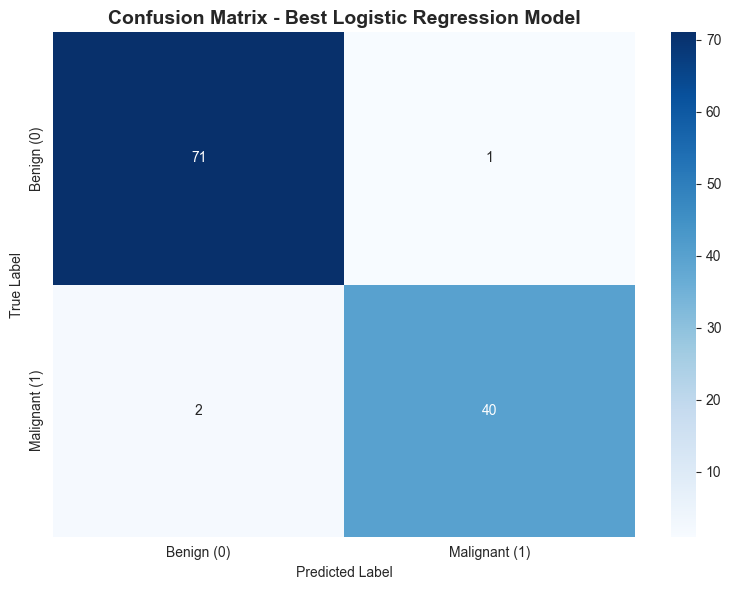


3.9 Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


3.10 ROC Curve:


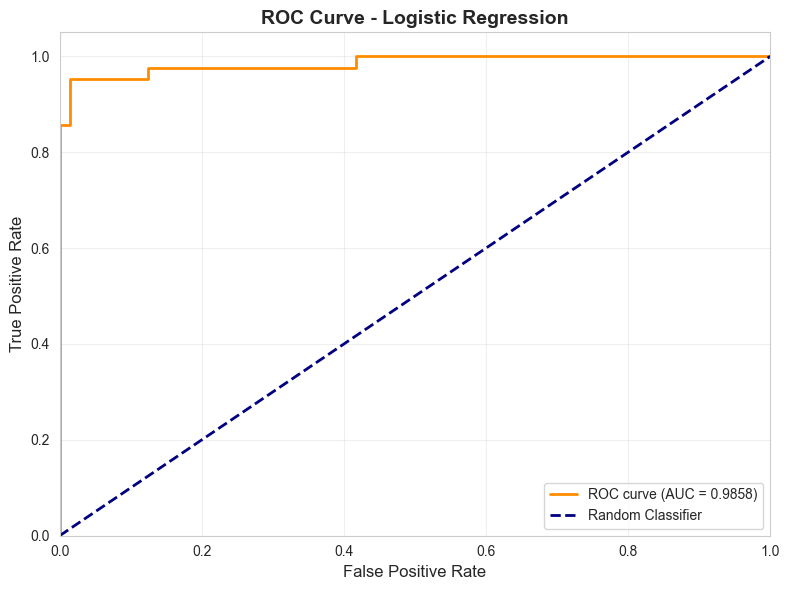


3.11 Feature Importance (Coefficients):

Top 10 Most Important Features:
        Feature  Coefficient  Abs_Coefficient
       RadiusSE     3.352879         3.352879
       TextureW     3.239097         3.239097
     ConcavityW     2.573770         2.573770
      SymmetryW     2.550941         2.550941
         AreaSE     2.532745         2.532745
   CompactnessM    -2.428154         2.428154
 ConcavePointsM     2.395994         2.395994
ConcavePointsSE     2.217254         2.217254
          AreaW     1.824115         1.824115
     ConcavityM     1.758176         1.758176


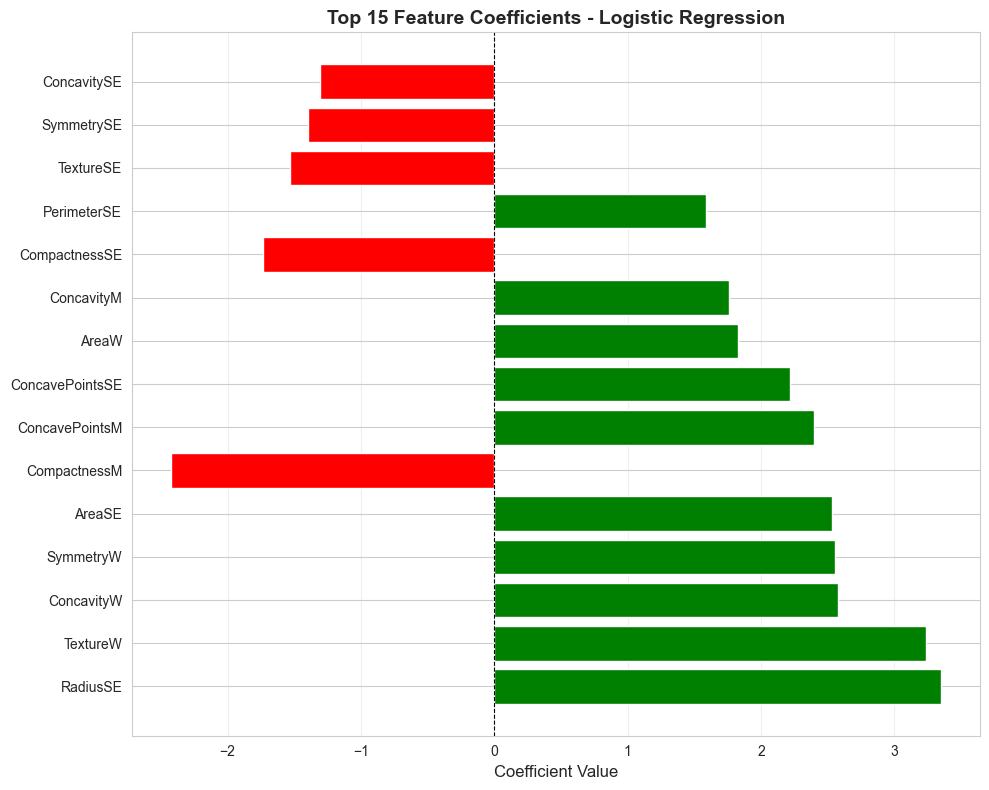


3.12 Model Comparison Summary:
                       Model  Accuracy  ROC-AUC  F1-Score
Baseline (No Regularization)  0.964912 0.996032  0.951220
                  L1 (Lasso)  0.973684 0.996362  0.963855
                  L2 (Ridge)  0.964912 0.996032  0.951220
          Tuned Model (Best)  0.973684 0.985780  0.963855

Model Building Complete!


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("Step 3: Model Building - Logistic Regression")
print("="*70)

# ==================== 3.1 Load and Prepare Data ====================
df = pd.read_csv('HW3-data.csv')

# Encode target variable
df['Diagnosis_encoded'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Prepare features and target
feature_cols = df.columns.drop(['ID', 'Diagnosis', 'Diagnosis_encoded'])
X = df[feature_cols]
y = df['Diagnosis_encoded']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Class distribution:\n{y.value_counts()}")
print("="*70)

# ==================== 3.2 Train-Test Split ====================
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n3.2 Train-Test Split (80-20):")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:\n{y_train.value_counts()}")
print(f"\nTest set class distribution:\n{y_test.value_counts()}")
print("="*70)

# ==================== 3.3 Feature Standardization ====================
print("\n3.3 Feature Standardization:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)

print("Standardization complete!")
print(f"Mean of scaled training features: {X_train_scaled.mean().mean():.6f}")
print(f"Std of scaled training features: {X_train_scaled.std().mean():.6f}")
print("="*70)

# ==================== 3.4 Baseline Model - Logistic Regression ====================
print("\n3.4 Baseline Logistic Regression Model:")

# Train baseline model
lr_baseline = LogisticRegression(random_state=42, max_iter=10000)
lr_baseline.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lr_baseline.predict(X_train_scaled)
y_test_pred = lr_baseline.predict(X_test_scaled)
y_test_proba = lr_baseline.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("\nBaseline Model Performance:")
print("-" * 50)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"Test F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print("="*70)

# ==================== 3.5 Regularization - L1 (Lasso) and L2 (Ridge) ====================
print("\n3.5 Regularized Logistic Regression:")

# L1 Regularization (Lasso)
print("\n(a) L1 Regularization (Lasso):")
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, 
                           random_state=42, max_iter=10000)
lr_l1.fit(X_train_scaled, y_train)

y_test_pred_l1 = lr_l1.predict(X_test_scaled)
y_test_proba_l1 = lr_l1.predict_proba(X_test_scaled)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_l1):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_proba_l1):.4f}")
print(f"Non-zero coefficients: {np.sum(lr_l1.coef_ != 0)}/{len(lr_l1.coef_[0])}")

# L2 Regularization (Ridge)
print("\n(b) L2 Regularization (Ridge):")
lr_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, 
                           random_state=42, max_iter=10000)
lr_l2.fit(X_train_scaled, y_train)

y_test_pred_l2 = lr_l2.predict(X_test_scaled)
y_test_proba_l2 = lr_l2.predict_proba(X_test_scaled)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_l2):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_proba_l2):.4f}")
print("="*70)

# ==================== 3.6 Hyperparameter Tuning ====================
print("\n3.6 Hyperparameter Tuning with GridSearchCV:")

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=10000),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation ROC-AUC: {grid_search.best_score_:.4f}")

# Best model
lr_best = grid_search.best_estimator_

# Evaluate best model
y_test_pred_best = lr_best.predict(X_test_scaled)
y_test_proba_best = lr_best.predict_proba(X_test_scaled)[:, 1]

print("\nBest Model Performance on Test Set:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba_best):.4f}")
print("="*70)

# ==================== 3.7 Cross-Validation ====================
print("\n3.7 Cross-Validation (5-Fold):")

cv_scores = cross_val_score(lr_best, X_train_scaled, y_train, 
                            cv=5, scoring='roc_auc')

print(f"Cross-validation ROC-AUC scores: {cv_scores}")
print(f"Mean CV ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print("="*70)

# ==================== 3.8 Confusion Matrix ====================
print("\n3.8 Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred_best)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix - Best Logistic Regression Model', 
          fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('Confusion_Matrix.png', dpi=600, bbox_inches='tight')
plt.show()

# ==================== 3.9 Classification Report ====================
print("\n3.9 Classification Report:")
print(classification_report(y_test, y_test_pred_best, 
                          target_names=['Benign', 'Malignant']))
print("="*70)

# ==================== 3.10 ROC Curve ====================
print("\n3.10 ROC Curve:")
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_best)
roc_auc = roc_auc_score(y_test, y_test_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('ROC_Curve.png', dpi=600, bbox_inches='tight')
plt.show()

# ==================== 3.11 Feature Importance ====================
print("\n3.11 Feature Importance (Coefficients):")

# Get coefficients
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_best.coef_[0]
})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(coef_df.head(10).to_string(index=False))

# Visualization
plt.figure(figsize=(10, 8))
top_features = coef_df.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 15 Feature Coefficients - Logistic Regression', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('Feature_Importance.png', dpi=600, bbox_inches='tight')
plt.show()

# ==================== 3.12 Model Comparison Summary ====================
print("\n" + "="*70)
print("3.12 Model Comparison Summary:")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Baseline (No Regularization)', 'L1 (Lasso)', 'L2 (Ridge)', 
              'Tuned Model (Best)'],
    'Accuracy': [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_pred_l1),
        accuracy_score(y_test, y_test_pred_l2),
        accuracy_score(y_test, y_test_pred_best)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba_l1),
        roc_auc_score(y_test, y_test_proba_l2),
        roc_auc_score(y_test, y_test_proba_best)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred_l1),
        f1_score(y_test, y_test_pred_l2),
        f1_score(y_test, y_test_pred_best)
    ]
})

print(comparison_df.to_string(index=False))

print("\n" + "="*70)
print("Model Building Complete!")
print("="*70)

Step 3: Model Building - Logistic Regression

Feature matrix shape: (569, 30)
Target vector shape: (569,)
Class distribution:
Diagnosis_encoded
0    357
1    212
Name: count, dtype: int64

3.2 Train-Test Split (80-20):
Training set: 455 samples
Test set: 114 samples

Training set class distribution:
Diagnosis_encoded
0    285
1    170
Name: count, dtype: int64

Test set class distribution:
Diagnosis_encoded
0    72
1    42
Name: count, dtype: int64

3.3 Feature Standardization:
Standardization complete!
Mean of scaled training features: 0.000000
Std of scaled training features: 1.001101

3.4 Baseline Logistic Regression Model:

Baseline Model Performance:
--------------------------------------------------
Training Accuracy: 0.9868
Test Accuracy: 0.9649
Test Precision: 0.9750
Test Recall: 0.9286
Test F1-Score: 0.9512
Test ROC-AUC: 0.9960

3.4.1 Generating Logistic Regression S-Curves...


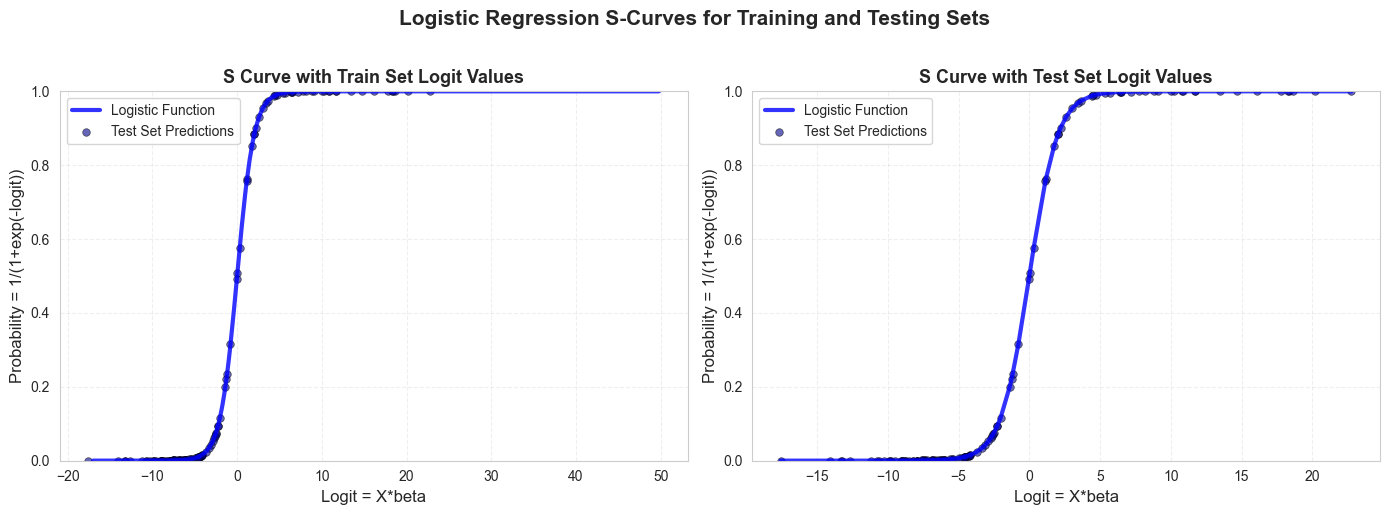

✓ S-Curve visualization saved (Logit vs Probability)
  Train set logit range: [-17.01, 49.79]
  Test set logit range: [-17.56, 22.76]

3.5 Regularized Logistic Regression:

(a) L1 Regularization (Lasso):
Test Accuracy: 0.9737
Test ROC-AUC: 0.9964
Non-zero coefficients: 14/30

(b) L2 Regularization (Ridge):
Test Accuracy: 0.9649
Test ROC-AUC: 0.9960

3.6 Hyperparameter Tuning with GridSearchCV:
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation ROC-AUC: 0.9957

Best Model Performance on Test Set:
--------------------------------------------------
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-Score: 0.9639
ROC-AUC: 0.9858

3.7 Cross-Validation (5-Fold):
Cross-validation ROC-AUC scores: [0.99742002 1.         0.9871001  1.         0.99380805]
Mean CV ROC-AUC: 0.9957 (+/- 0.0097)

3.8 Confusion Matrix:
[[71  1]
 [ 2 40]]


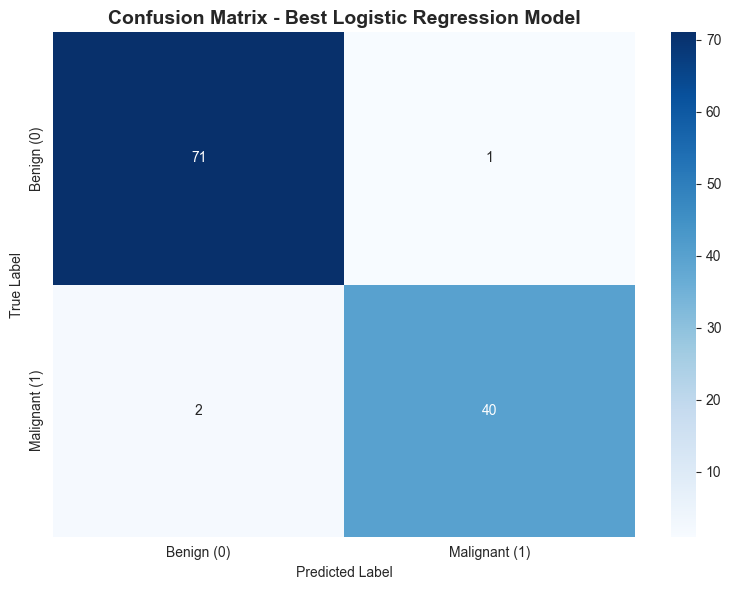


3.9 Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


3.10 ROC Curve:


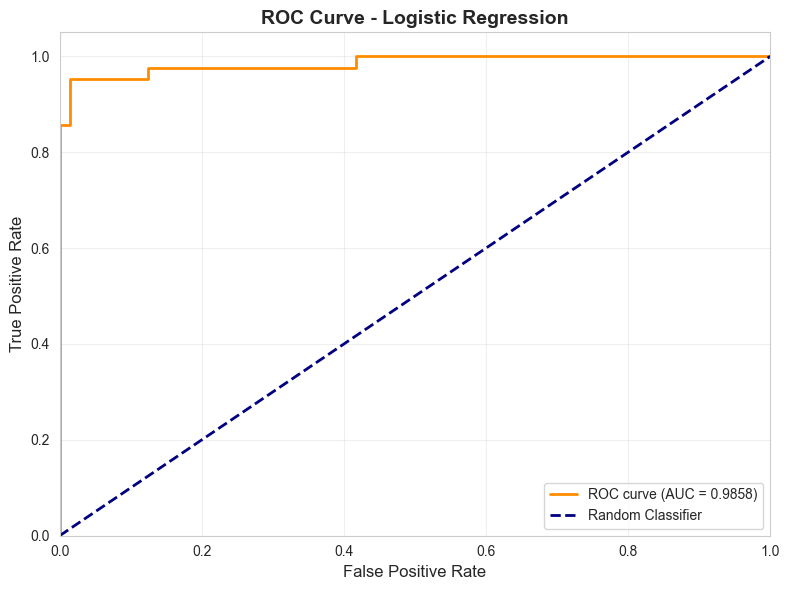


3.11 Feature Importance (Coefficients):

Top 10 Most Important Features:
        Feature  Coefficient  Abs_Coefficient
       RadiusSE     3.352879         3.352879
       TextureW     3.239097         3.239097
     ConcavityW     2.573770         2.573770
      SymmetryW     2.550941         2.550941
         AreaSE     2.532745         2.532745
   CompactnessM    -2.428154         2.428154
 ConcavePointsM     2.395994         2.395994
ConcavePointsSE     2.217254         2.217254
          AreaW     1.824115         1.824115
     ConcavityM     1.758176         1.758176


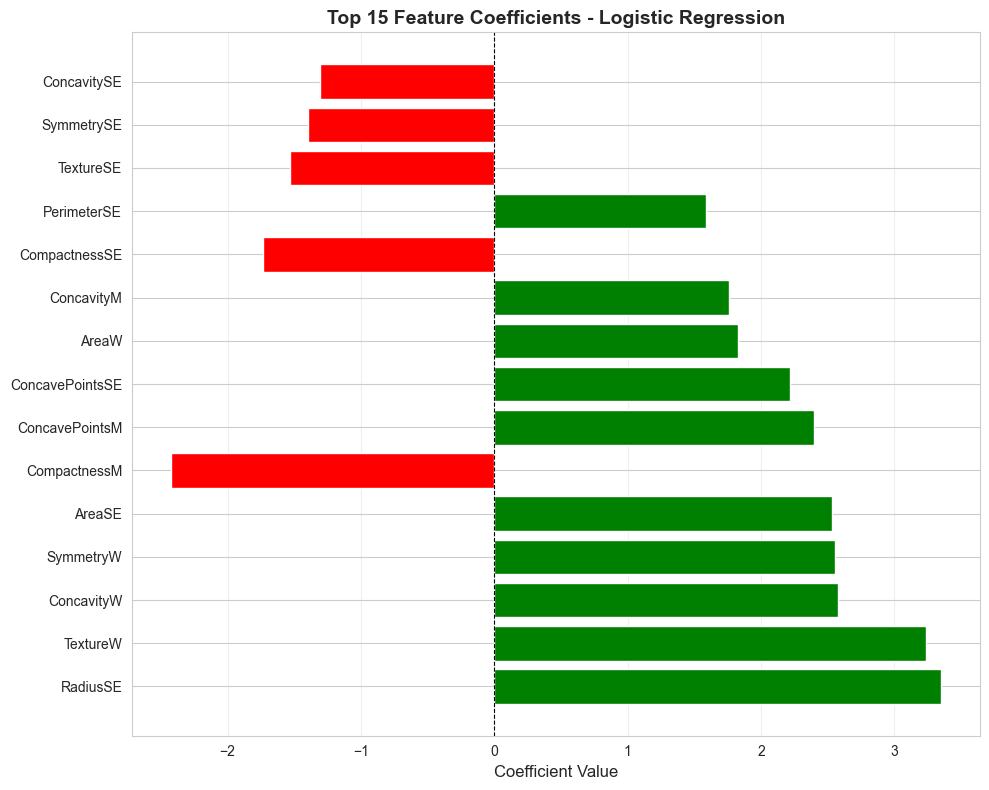


3.12 Model Comparison Summary:
                       Model  Accuracy  ROC-AUC  F1-Score
Baseline (No Regularization)  0.964912 0.996032  0.951220
                  L1 (Lasso)  0.973684 0.996362  0.963855
                  L2 (Ridge)  0.964912 0.996032  0.951220
          Tuned Model (Best)  0.973684 0.985780  0.963855

3.13 SHAP Analysis - Model Interpretation

SHAP values calculated successfully!
SHAP values shape: (114, 30)

Top 10 Features by Mean Absolute SHAP Value:
----------------------------------------------------------------------
        Feature  Mean_Abs_SHAP
       TextureW       2.824982
       RadiusSE       2.068978
     ConcavityW       1.958943
 ConcavePointsM       1.817490
   CompactnessM       1.800981
      SymmetryW       1.780286
ConcavePointsSE       1.633574
          AreaW       1.386747
         AreaSE       1.344519
  CompactnessSE       1.314506

3.13.1 Generating SHAP Summary Plot (Core Visualization)...


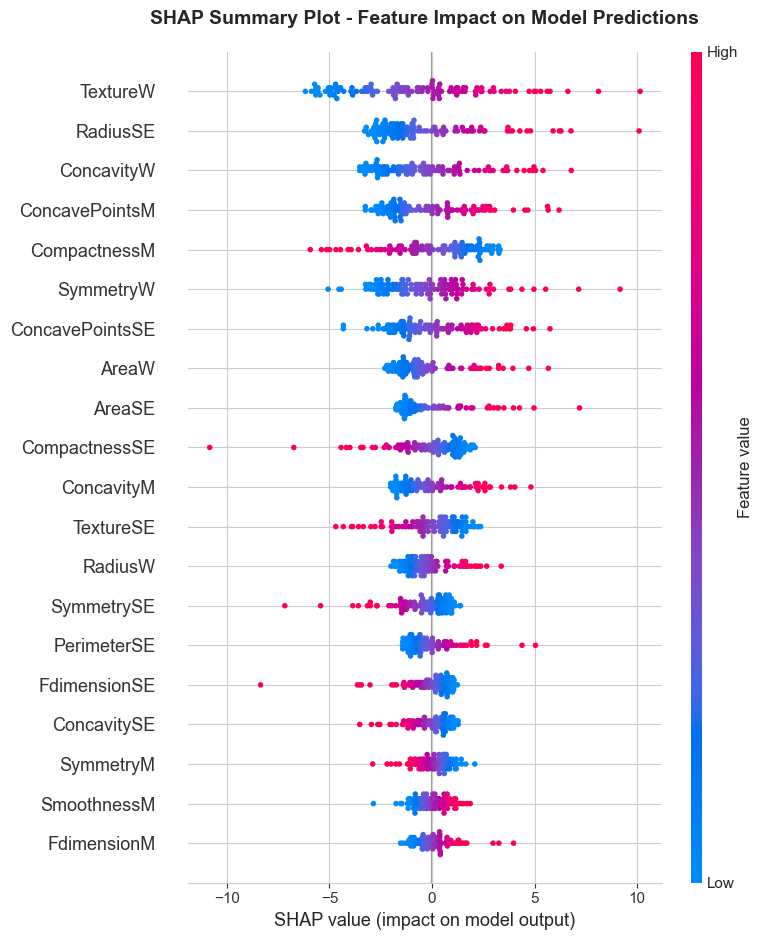

✓ SHAP Summary Plot saved - Shows feature importance and impact direction

3.13.2 Generating SHAP Waterfall Plot (Example Prediction)...


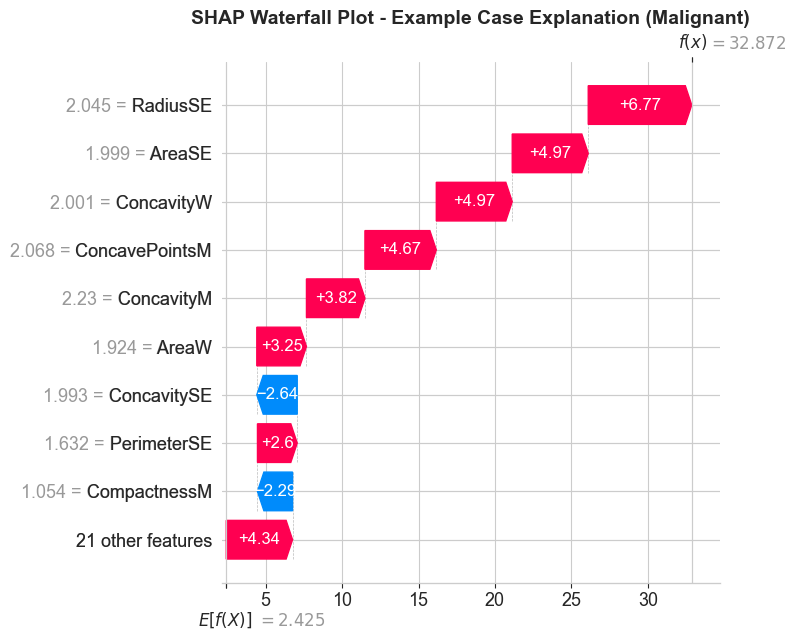

✓ SHAP Waterfall Plot saved - Individual prediction explanation
  Sample Index: 250, True Label: Malignant
  Predicted Probability: 1.0000

SHAP Analysis Complete!

FINAL MODEL SUMMARY

Best Model Configuration:
  - Algorithm: Logistic Regression
  - Penalty: l2
  - C (Inverse Regularization): 10
  - Solver: liblinear

Performance Metrics (Test Set):
  - Accuracy: 0.9737
  - Precision: 0.9756
  - Recall: 0.9524
  - F1-Score: 0.9639
  - ROC-AUC: 0.9858

Top 5 Most Important Features (by SHAP):
  22. TextureW: 2.8250
  11. RadiusSE: 2.0690
  27. ConcavityW: 1.9589
  8. ConcavePointsM: 1.8175
  6. CompactnessM: 1.8010

Key Insights from SHAP Analysis:
  - SHAP values provide instance-level explanations for each prediction
  - Feature importance ranking shows which features drive predictions
  - Dependence plots reveal non-linear relationships and interactions
  - Force plots visualize how features push predictions toward each class

Model Building and Interpretation Complete!
All visualiz

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("Step 3: Model Building - Logistic Regression")
print("="*70)

# ==================== 3.1 Load and Prepare Data ====================
df = pd.read_csv('HW3-data.csv')

# Encode target variable
df['Diagnosis_encoded'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Prepare features and target
feature_cols = df.columns.drop(['ID', 'Diagnosis', 'Diagnosis_encoded'])
X = df[feature_cols]
y = df['Diagnosis_encoded']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Class distribution:\n{y.value_counts()}")
print("="*70)

# ==================== 3.2 Train-Test Split ====================
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n3.2 Train-Test Split (80-20):")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:\n{y_train.value_counts()}")
print(f"\nTest set class distribution:\n{y_test.value_counts()}")
print("="*70)

# ==================== 3.3 Feature Standardization ====================
print("\n3.3 Feature Standardization:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)

print("Standardization complete!")
print(f"Mean of scaled training features: {X_train_scaled.mean().mean():.6f}")
print(f"Std of scaled training features: {X_train_scaled.std().mean():.6f}")
print("="*70)

# ==================== 3.4 Baseline Model - Logistic Regression ====================
print("\n3.4 Baseline Logistic Regression Model:")

# Train baseline model
lr_baseline = LogisticRegression(random_state=42, max_iter=10000)
lr_baseline.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lr_baseline.predict(X_train_scaled)
y_test_pred = lr_baseline.predict(X_test_scaled)
y_test_proba = lr_baseline.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("\nBaseline Model Performance:")
print("-" * 50)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"Test F1-Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_proba):.4f}")

# ==================== 3.4.1 S-Curve Visualization (Logit vs Probability) ====================
print("\n3.4.1 Generating Logistic Regression S-Curves...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Calculate logit values (X*beta) for train and test sets
train_logit = np.dot(X_train_scaled, lr_baseline.coef_.T) + lr_baseline.intercept_
test_logit = np.dot(X_test_scaled, lr_baseline.coef_.T) + lr_baseline.intercept_

train_proba = lr_baseline.predict_proba(X_train_scaled)[:, 1]

# ===== Left Plot: Training Set =====
# Sort by logit values for smooth curve
train_sort_idx = np.argsort(train_logit.flatten())
sorted_train_logit = train_logit.flatten()[train_sort_idx]
sorted_train_proba = train_proba[train_sort_idx]

# Plot logistic function curve
axes[0].plot(sorted_train_logit, sorted_train_proba, 'b-', 
            linewidth=3, label='Logistic Function', alpha=0.8)

# Scatter test set predictions on training curve
axes[0].scatter(test_logit.flatten(), y_test_proba, 
               color='darkblue', s=30, alpha=0.6, 
               label='Test Set Predictions', edgecolors='black', linewidth=0.5)

axes[0].set_xlabel('Logit = X*beta', fontsize=12)
axes[0].set_ylabel('Probability = 1/(1+exp(-logit))', fontsize=12)
axes[0].set_title('S Curve with Train Set Logit Values', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left', fontsize=10)
axes[0].grid(alpha=0.3, linestyle='--')
axes[0].set_ylim([0, 1.0])

# ===== Right Plot: Test Set =====
# Sort by logit values for smooth curve
test_sort_idx = np.argsort(test_logit.flatten())
sorted_test_logit = test_logit.flatten()[test_sort_idx]
sorted_test_proba = y_test_proba[test_sort_idx]

# Plot logistic function curve
axes[1].plot(sorted_test_logit, sorted_test_proba, 'b-', 
            linewidth=3, label='Logistic Function', alpha=0.8)

# Scatter test set predictions
axes[1].scatter(test_logit.flatten(), y_test_proba, 
               color='darkblue', s=30, alpha=0.6, 
               label='Test Set Predictions', edgecolors='black', linewidth=0.5)

axes[1].set_xlabel('Logit = X*beta', fontsize=12)
axes[1].set_ylabel('Probability = 1/(1+exp(-logit))', fontsize=12)
axes[1].set_title('S Curve with Test Set Logit Values', fontsize=13, fontweight='bold')
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(alpha=0.3, linestyle='--')
axes[1].set_ylim([0, 1.0])

plt.suptitle('Logistic Regression S-Curves for Training and Testing Sets', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('Logistic_S_Curves.png', dpi=600, bbox_inches='tight')
plt.show()

print("✓ S-Curve visualization saved (Logit vs Probability)")
print(f"  Train set logit range: [{train_logit.min():.2f}, {train_logit.max():.2f}]")
print(f"  Test set logit range: [{test_logit.min():.2f}, {test_logit.max():.2f}]")
print("="*70)

# ==================== 3.5 Regularization - L1 (Lasso) and L2 (Ridge) ====================
print("\n3.5 Regularized Logistic Regression:")

# L1 Regularization (Lasso)
print("\n(a) L1 Regularization (Lasso):")
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, 
                           random_state=42, max_iter=10000)
lr_l1.fit(X_train_scaled, y_train)

y_test_pred_l1 = lr_l1.predict(X_test_scaled)
y_test_proba_l1 = lr_l1.predict_proba(X_test_scaled)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_l1):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_proba_l1):.4f}")
print(f"Non-zero coefficients: {np.sum(lr_l1.coef_ != 0)}/{len(lr_l1.coef_[0])}")

# L2 Regularization (Ridge)
print("\n(b) L2 Regularization (Ridge):")
lr_l2 = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, 
                           random_state=42, max_iter=10000)
lr_l2.fit(X_train_scaled, y_train)

y_test_pred_l2 = lr_l2.predict(X_test_scaled)
y_test_proba_l2 = lr_l2.predict_proba(X_test_scaled)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_l2):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_test_proba_l2):.4f}")
print("="*70)

# ==================== 3.6 Hyperparameter Tuning ====================
print("\n3.6 Hyperparameter Tuning with GridSearchCV:")

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=10000),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation ROC-AUC: {grid_search.best_score_:.4f}")

# Best model
lr_best = grid_search.best_estimator_

# Evaluate best model
y_test_pred_best = lr_best.predict(X_test_scaled)
y_test_proba_best = lr_best.predict_proba(X_test_scaled)[:, 1]

print("\nBest Model Performance on Test Set:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_best):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba_best):.4f}")
print("="*70)

# ==================== 3.7 Cross-Validation ====================
print("\n3.7 Cross-Validation (5-Fold):")

cv_scores = cross_val_score(lr_best, X_train_scaled, y_train, 
                            cv=5, scoring='roc_auc')

print(f"Cross-validation ROC-AUC scores: {cv_scores}")
print(f"Mean CV ROC-AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print("="*70)

# ==================== 3.8 Confusion Matrix ====================
print("\n3.8 Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred_best)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix - Best Logistic Regression Model', 
          fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('Confusion_Matrix.png', dpi=600, bbox_inches='tight')
plt.show()

# ==================== 3.9 Classification Report ====================
print("\n3.9 Classification Report:")
print(classification_report(y_test, y_test_pred_best, 
                          target_names=['Benign', 'Malignant']))
print("="*70)

# ==================== 3.10 ROC Curve ====================
print("\n3.10 ROC Curve:")
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_best)
roc_auc = roc_auc_score(y_test, y_test_proba_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('ROC_Curve.png', dpi=600, bbox_inches='tight')
plt.show()

# ==================== 3.11 Feature Importance ====================
print("\n3.11 Feature Importance (Coefficients):")

# Get coefficients
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_best.coef_[0]
})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(coef_df.head(10).to_string(index=False))

# Visualization
plt.figure(figsize=(10, 8))
top_features = coef_df.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 15 Feature Coefficients - Logistic Regression', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('Feature_Importance.png', dpi=600, bbox_inches='tight')
plt.show()

# ==================== 3.12 Model Comparison Summary ====================
print("\n" + "="*70)
print("3.12 Model Comparison Summary:")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Baseline (No Regularization)', 'L1 (Lasso)', 'L2 (Ridge)', 
              'Tuned Model (Best)'],
    'Accuracy': [
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_test, y_test_pred_l1),
        accuracy_score(y_test, y_test_pred_l2),
        accuracy_score(y_test, y_test_pred_best)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba_l1),
        roc_auc_score(y_test, y_test_proba_l2),
        roc_auc_score(y_test, y_test_proba_best)
    ],
    'F1-Score': [
        f1_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred_l1),
        f1_score(y_test, y_test_pred_l2),
        f1_score(y_test, y_test_pred_best)
    ]
})

print(comparison_df.to_string(index=False))

# ==================== 3.13 SHAP Analysis for Model Interpretation ====================
print("\n" + "="*70)
print("3.13 SHAP Analysis - Model Interpretation")
print("="*70)

import shap

# Initialize SHAP explainer for logistic regression
explainer = shap.LinearExplainer(lr_best, X_train_scaled)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test_scaled)

print("\nSHAP values calculated successfully!")
print(f"SHAP values shape: {shap_values.shape}")

# Calculate mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values('Mean_Abs_SHAP', ascending=False)

print("\nTop 10 Features by Mean Absolute SHAP Value:")
print("-" * 70)
print(shap_importance_df.head(10).to_string(index=False))

# ==================== Core Figure 1: SHAP Summary Plot ====================
print("\n3.13.1 Generating SHAP Summary Plot (Core Visualization)...")

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_scaled, plot_type="dot", show=False)
plt.title('SHAP Summary Plot - Feature Impact on Model Predictions', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('SHAP_Summary_Plot.png', dpi=600, bbox_inches='tight')
plt.show()

print("✓ SHAP Summary Plot saved - Shows feature importance and impact direction")

# ==================== Core Figure 2: SHAP Waterfall for One Case ====================
print("\n3.13.2 Generating SHAP Waterfall Plot (Example Prediction)...")

# Create SHAP Explanation object
shap_explanation = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_test_scaled.values,
    feature_names=feature_cols.tolist()
)

# Select a representative malignant case
malignant_idx = y_test[y_test == 1].index[0]
test_idx_malignant = X_test_scaled.index.get_loc(malignant_idx)

plt.figure(figsize=(10, 8))
shap.waterfall_plot(shap_explanation[test_idx_malignant], show=False)
plt.title(f'SHAP Waterfall Plot - Example Case Explanation (Malignant)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('SHAP_Waterfall_Example.png', dpi=600, bbox_inches='tight')
plt.show()

print(f"✓ SHAP Waterfall Plot saved - Individual prediction explanation")
print(f"  Sample Index: {malignant_idx}, True Label: Malignant")
print(f"  Predicted Probability: {lr_best.predict_proba(X_test_scaled.iloc[[test_idx_malignant]])[0][1]:.4f}")

print("\n" + "="*70)
print("SHAP Analysis Complete!")
print("="*70)

# ==================== 3.14 Final Summary ====================
print("\n" + "="*70)
print("FINAL MODEL SUMMARY")
print("="*70)

print("\nBest Model Configuration:")
print(f"  - Algorithm: Logistic Regression")
print(f"  - Penalty: {lr_best.penalty}")
print(f"  - C (Inverse Regularization): {lr_best.C}")
print(f"  - Solver: {lr_best.solver}")

print("\nPerformance Metrics (Test Set):")
print(f"  - Accuracy: {accuracy_score(y_test, y_test_pred_best):.4f}")
print(f"  - Precision: {precision_score(y_test, y_test_pred_best):.4f}")
print(f"  - Recall: {recall_score(y_test, y_test_pred_best):.4f}")
print(f"  - F1-Score: {f1_score(y_test, y_test_pred_best):.4f}")
print(f"  - ROC-AUC: {roc_auc_score(y_test, y_test_proba_best):.4f}")

print("\nTop 5 Most Important Features (by SHAP):")
for i, row in shap_importance_df.head(5).iterrows():
    print(f"  {i+1}. {row['Feature']}: {row['Mean_Abs_SHAP']:.4f}")

print("\nKey Insights from SHAP Analysis:")
print("  - SHAP values provide instance-level explanations for each prediction")
print("  - Feature importance ranking shows which features drive predictions")
print("  - Dependence plots reveal non-linear relationships and interactions")
print("  - Force plots visualize how features push predictions toward each class")

print("\n" + "="*70)
print("Model Building and Interpretation Complete!")
print("All visualizations saved successfully!")
print("="*70)